# Procesamiento de los datos

1. Levantamos el dataframe con los datos ya preparados

In [2]:
import pandas as pd
df = pd.read_parquet("/home/mpccolorado/movimientos_curados4.parquet")

In [3]:
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None) # or 1000.
pd.set_option('display.max_rows', None) # or 1000.
pd.set_option('display.max_colwidth', None) # or 199.

### Transformamos la columna mes-año
Hacemos un DictVectorizer de la columna 'mes-año' porque nos resulta importante dejar el mes en el estudio

In [4]:
from sklearn import feature_extraction
import numpy as np

def get_dataframe_with_mes_año(dataframe):
    df_copy = dataframe.copy()
    feature_cols = ['mes-año']
    features = list(df_copy[feature_cols].T.to_dict().values())

    vectorizer = feature_extraction.DictVectorizer(sparse=False)
    feature_matrix = vectorizer.fit_transform(features)
    feature_names = vectorizer.get_feature_names()
    
    df_copy.drop('mes-año', axis=1, inplace=True)
    matriz_densa_completa = np.hstack([feature_matrix, df_copy.values])
    
    return pd.DataFrame(data=matriz_densa_completa, columns=feature_names + df_copy.columns.values.tolist())

### Escalado
Agrupamos las columnas relacionadas en distintos arrays:

In [5]:
meses_features = [
    'mes-año=2020-07','mes-año=2020-08','mes-año=2020-09','mes-año=2020-10','mes-año=2020-11','mes-año=2020-12',
    'mes-año=2021-01','mes-año=2021-02','mes-año=2021-03','mes-año=2021-04','mes-año=2021-05'
]
edad_features = [
    'rango_edad=(17, 27]','rango_edad=(27, 37]','rango_edad=(37, 47]','rango_edad=(47, 57]','rango_edad=(57, 67]',
    'rango_edad=(67, 77]','rango_edad=(77, 109]'
]
estado_civil_features = [
    'estado_civil_descripcion=Casadoa','estado_civil_descripcion=Divorciadoa',
    'estado_civil_descripcion=Separacion de hecho','estado_civil_descripcion=Sin Datos',
    'estado_civil_descripcion=Solteroa','estado_civil_descripcion=Viudoa'
]
sexo_features = [ 'sexo_descripcion=Hombre','sexo_descripcion=Mujer' ]
provincia_features = [
    'provincia=BUENOS AIRES','provincia=CAPITAL FEDERAL','provincia=CATAMARCA','provincia=CHACO',
    'provincia=CHUBUT','provincia=CORDOBA','provincia=CORRIENTES','provincia=ENTRE RIOS',
    'provincia=FORMOSA','provincia=JUJUY','provincia=LA PAMPA','provincia=LA RIOJA',
    'provincia=MENDOZA','provincia=MISIONES','provincia=NEUQUEN','provincia=RIO NEGRO',
    'provincia=SALTA','provincia=SAN JUAN','provincia=SAN LUIS','provincia=SANTA CRUZ',
    'provincia=SANTA FE','provincia=SGO. DEL ESTERO','provincia=TIERRA DEL FUEGO','provincia=TUCUMAN'
]
antig_features = [
    'rango_antig=(-1, 4]','rango_antig=(14, 19]','rango_antig=(19, 24]','rango_antig=(24, 32]',
    'rango_antig=(4, 9]','rango_antig=(9, 14]'
]
cargo_features = [
    'cargo_cat=F','cargo_cat=I','cargo_cat=PEONEMBARCADOS','cargo_cat=PORTEROCONSERJ','cargo_cat=PROFESTECNICO',
    'cargo_cat=RD','cargo_cat=RDO','cargo_cat=SD','cargo_cat=VENDEDORPROMOT'
]
nivel_estudio_features = [
    'nivel_estudio_descripcion_histo=PRIMARIOS','nivel_estudio_descripcion_histo=SECUNDARIOS',
    'nivel_estudio_descripcion_histo=TERCIARIOS','nivel_estudio_descripcion_histo=UNIVERSITARIOS'
]
vivienda_features = [ 'rel_vivienda_descripcion_histo=Otros','rel_vivienda_descripcion_histo=Propia' ]
producto_features = [
    'producto_naranja_movimiento=AV','producto_naranja_movimiento=AX','producto_naranja_movimiento=EX',
    'producto_naranja_movimiento=MC','producto_naranja_movimiento=PC','producto_naranja_movimiento=PL',
    'producto_naranja_movimiento=PN','producto_naranja_movimiento=PP','producto_naranja_movimiento=SM',
    'producto_naranja_movimiento=TA','producto_naranja_movimiento=VI','producto_naranja_movimiento=ZE'
]
tipo_producto_features = [
    'tipo_producto_tarjeta_movimiento=0','tipo_producto_tarjeta_movimiento=3','tipo_producto_tarjeta_movimiento=99'
]
debito_features = [ 'marca_debito_automatico=0','marca_debito_automatico=1' ]
cat_comercio_features = [
    'cat_comercio=0','cat_comercio=1','cat_comercio=2','cat_comercio=3','cat_comercio=4',
    'cat_comercio=5','cat_comercio=6','cat_comercio=7','cat_comercio=8','cat_comercio=9'
]
plan_features = [
    'plan_movimiento=1','plan_movimiento=10','plan_movimiento=11','plan_movimiento=12','plan_movimiento=2',
    'plan_movimiento=3','plan_movimiento=4','plan_movimiento=5','plan_movimiento=6','plan_movimiento=8',
    'plan_movimiento=9'
]
target_feature = ['monto_normalizado']

#### Escalado 1
Creamos distintos objetos para escalar los datos de acuerdo a su tipo y de acuerdo a su grupo

In [6]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler

producto_scaler = StandardScaler()
tipo_producto_scaler = StandardScaler()
debito_scaler = StandardScaler()
cat_comercio_scaler = StandardScaler()
plan_scaler = StandardScaler()

preprocessor1 = ColumnTransformer(
    transformers=[
        ('meses', 'passthrough', meses_features),
        ('edad', 'passthrough', edad_features),
        ('estado_civil', 'passthrough', estado_civil_features),
        ('sexo', 'passthrough', sexo_features),
        ('provincia', 'passthrough', provincia_features),
        ('antig', 'passthrough', antig_features),
        ('cargo', 'passthrough', cargo_features),
        ('nivel_estudio', 'passthrough', nivel_estudio_features),
        ('vivienda', 'passthrough', vivienda_features),
        ('producto', producto_scaler, producto_features),
        ('tipo_producto', tipo_producto_scaler, tipo_producto_features),
        ('debito', debito_scaler, debito_features),
        ('cat_comercio', cat_comercio_scaler, cat_comercio_features),
        ('plan', plan_scaler, plan_features)
    ]
)

#### Escalado 2
Escalaremos todos los features numéricos usando el mismo escalador.

In [7]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler

standard_scaler = StandardScaler()

preprocessor2 = ColumnTransformer(
    transformers=[
        ('meses', 'passthrough', meses_features),
        ('edad', 'passthrough', edad_features),
        ('estado_civil', 'passthrough', estado_civil_features),
        ('sexo', 'passthrough', sexo_features),
        ('provincia', 'passthrough', provincia_features),
        ('antig', 'passthrough', antig_features),
        ('cargo', 'passthrough', cargo_features),
        ('nivel_estudio', 'passthrough', nivel_estudio_features),
        ('vivienda', 'passthrough', vivienda_features),
        ('numeric_features', standard_scaler, 
         producto_features + tipo_producto_features + debito_features + cat_comercio_features + plan_features)
    ]
)

**Queda pendiente probar escalando el target**

---

# Regresión

In [8]:
df_reg = df.copy()
df_reg.drop(['dni'], axis=1, inplace=True)

In [9]:
df_reg = get_dataframe_with_mes_año(df_reg)

#### Funciones de error

In [10]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

def evaluate_errors(model, X_train, X_test, y_train, y_test, description):
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    (train_error_MSE, test_error_MSE) = evaluate_MSE(y_train, y_train_pred, y_test, y_test_pred)
    (train_error_RMSE, test_error_RMSE) = evaluate_RMSE(y_train, y_train_pred, y_test, y_test_pred)
    (train_error_MAE, test_error_MAE) = evaluate_MAE(y_train, y_train_pred, y_test, y_test_pred)
    errors = pd.DataFrame(data=[], columns=['description', 'train_error_MAE', 'test_error_MAE'])
    errors = errors.append(
        {
            'description': description, 
            'train_error_MSE': train_error_MSE, 
            'test_error_MSE': test_error_MSE, 
            'train_error_RMSE': train_error_RMSE, 
            'test_error_RMSE': test_error_RMSE, 
            'train_error_MAE': train_error_MAE, 
            'test_error_MAE': test_error_MAE
        }, ignore_index=True)
    return errors

def evaluate_MSE(y_train, y_train_pred, y_test, y_test_pred):
    train_error = mean_squared_error(y_train, y_train_pred)
    test_error = mean_squared_error(y_test, y_test_pred)
    #print(f'Train error MSE: {train_error}, Test error MSE: {test_error}')
    return (train_error, test_error)

def evaluate_RMSE(y_train, y_train_pred, y_test, y_test_pred):
    train_error = np.sqrt(mean_squared_error(y_train, y_train_pred))
    test_error = np.sqrt(mean_squared_error(y_test, y_test_pred))
    #print(f'Train error RMSE {train_error.round(3)}, Test error RMSE {test_error.round(3)}')
    return (train_error, test_error)

def evaluate_MAE(y_train, y_train_pred, y_test, y_test_pred):
    train_error = mean_absolute_error(y_train, y_train_pred)
    test_error = mean_absolute_error(y_test, y_test_pred)
    #print(f'Train error MAE {train_error.round(3)}, Test error MAE {test_error.round(3)}')
    return (train_error, test_error)

### División de los datos

In [11]:
from sklearn.model_selection import train_test_split
# División entre instancias y etiquetas
X, y = df_reg.drop('monto_normalizado', axis=1), df_reg.monto_normalizado

# División entre entrenamiento y evaluación
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

#### Función para simplificar el procesamiento
Para poder evaluar los distintos algoritmos, primero sin ningún tipo de escalado y luego con los preprocesadores de escalado 1 y  2

In [12]:
from sklearn.pipeline import Pipeline

In [13]:
def execute_models(regressor, grid_search=None, feature_selection=None):
    (errors1, model1) = execute_pipe(regressor, grid_search, None, feature_selection, 'no preprocessor')
    (errors2, model2) = execute_pipe(regressor, grid_search, preprocessor1, feature_selection, 'preprocessor 1')
    (errors3, model3) = execute_pipe(regressor, grid_search, preprocessor2, feature_selection, 'preprocessor 2')
    return (
        errors1.append(errors2).append(errors3),
        model1,
        model2,
        model3
    )

def execute_pipe(regressor, grid_search, preprocessor, feature_selection, description):
    pipes = []
    if preprocessor:
        pipes.append(('preprocessor', preprocessor))
    if feature_selection:
        pipes.append(('feature_selection', feature_selection))
    pipes.append(('regressor', regressor))

    pipe = Pipeline(pipes)
    if grid_search:
        model = grid_search(pipe)
    else:
        model = pipe
    model.fit(X_train, y_train)
    errors = evaluate_errors(model, X_train, X_test, y_train, y_test, description)
    return (errors, model)

------

## Linear SVR

### Default

In [14]:
from sklearn.svm import LinearSVR
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

(errors_svr, svr1, svr2, svr3) = execute_models(
    regressor = LinearSVR(random_state=0, tol=1e-5)
)
errors_svr

,description,train_error_MAE,test_error_MAE,test_error_MSE,test_error_RMSE,train_error_MSE,train_error_RMSE
0,no preprocessor,11848.978040,12585.664869,6.118666e+08,24735.937324,5.143428e+08,22679.126689
0,preprocessor 1,16285.198308,17234.469140,1.024347e+09,32005.423297,9.016761e+08,30027.921551
0,preprocessor 2,16285.198308,17234.469140,1.024347e+09,32005.423297,9.016761e+08,30027.921551


### Grid Search

In [15]:
from sklearn.model_selection import RandomizedSearchCV
param_grid = {
    'regressor__epsilon': [0.1, 0.01, 0.0001,0.001],
    'regressor__tol': [1e-3, 1e-4, 1e-5, 1e-6],
    'regressor__C': [1, 2, 0.01, 0.001, 0.0001],
    'regressor__loss': ['epsilon_insensitive', 'squared_epsilon_insensitive']
}
(errors_grid_svr, svr_grid_1, svr_grid_2, svr_grid_3) = execute_models(
    regressor = LinearSVR(random_state=0),
    grid_search = lambda pipe: RandomizedSearchCV(pipe, param_grid, scoring='neg_mean_squared_error',cv=5, n_iter=40)
)
errors_grid_svr

,description,train_error_MAE,test_error_MAE,test_error_MSE,test_error_RMSE,train_error_MSE,train_error_RMSE
0,no preprocessor,11479.896605,12403.110972,4.755313e+08,21806.679974,3.778087e+08,19437.301485
0,preprocessor 1,11531.391179,12437.960195,4.733020e+08,21755.506039,3.767183e+08,19409.231442
0,preprocessor 2,11531.377254,12437.940113,4.733012e+08,21755.486712,3.767182e+08,19409.230634


### Conclusiones
El mejor resultado lo obtuvimos con el modelo **"Linear SVR - Grid Search"** (svr_grid_1)

In [16]:
svr_grid_1.best_params_

{'regressor__tol': 0.001,
 'regressor__loss': 'squared_epsilon_insensitive',
 'regressor__epsilon': 0.0001,
 'regressor__C': 0.01}

In [17]:
svr_model = svr_grid_1

------

## SGDRegressor

### Default

In [18]:
from sklearn.linear_model import SGDRegressor
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
(errors_sgd, sgd1, sgd2, sgd3) = execute_models(
    regressor = SGDRegressor(random_state=0, max_iter=1000, tol=1e-3)
)
errors_sgd

,description,train_error_MAE,test_error_MAE,test_error_MSE,test_error_RMSE,train_error_MSE,train_error_RMSE
0,no preprocessor,1.264030e+11,1.235941e+11,2.486282e+22,1.576795e+11,2.570792e+22,1.603369e+11
0,preprocessor 1,1.205618e+04,1.256219e+04,4.844612e+08,2.201048e+04,7.150701e+08,2.674079e+04
0,preprocessor 2,1.205618e+04,1.256219e+04,4.844612e+08,2.201048e+04,7.150701e+08,2.674079e+04


### Grid Search

In [19]:
param_grid = {
    'regressor__loss': ['squared_error', 'huber', 'epsilon_insensitive', 'squared_epsilon_insensitive'],
    'regressor__penalty': ['l2', 'l1', 'elasticnet'],
    'regressor__alpha': [0.1, 0.01, 0.001, 0.0001],
    'regressor__tol': [1e-3, 1e-4, 1e-5, 1e-6],
    'regressor__epsilon': [0.1, 0.01, 0.0001,0.001]
}
(errors_grid_sgd, sgd_grid_1, sgd_grid_2, sgd_grid_3) = execute_models(
    regressor = SGDRegressor(random_state=0, max_iter=1000, tol=1e-3),
    grid_search = lambda pipe: RandomizedSearchCV(pipe, param_grid, scoring='neg_mean_squared_error',cv=5, n_iter=40)
)
errors_grid_sgd

,description,train_error_MAE,test_error_MAE,test_error_MSE,test_error_RMSE,train_error_MSE,train_error_RMSE
0,no preprocessor,12318.888837,12975.239764,6.355930e+08,25210.970303,5.444332e+08,23333.091465
0,preprocessor 1,20499.080861,21517.463943,1.396342e+09,37367.665374,1.262619e+09,35533.352284
0,preprocessor 2,20488.057303,21506.299319,1.395311e+09,37353.861201,1.261627e+09,35519.387629


### Conclusiones
El mejor resultado lo obtuvimos con el modelo **SGDRegressor - Grid Search** (sgd_grid_1)

In [20]:
sgd_grid_1.best_params_

{'regressor__tol': 1e-05,
 'regressor__penalty': 'l1',
 'regressor__loss': 'epsilon_insensitive',
 'regressor__epsilon': 0.001,
 'regressor__alpha': 0.0001}

In [21]:
sgd_model = sgd_grid_1

---

## KNeighborsRegressor

### Default

In [22]:
from sklearn.neighbors import KNeighborsRegressor
(errors_knn, knn1, knn2, knn3) = execute_models(
    regressor = KNeighborsRegressor(n_neighbors=2)
)
errors_knn

,description,train_error_MAE,test_error_MAE,test_error_MSE,test_error_RMSE,train_error_MSE,train_error_RMSE
0,no preprocessor,6534.105184,12521.542820,5.363293e+08,23158.784276,1.594267e+08,12626.427769
0,preprocessor 1,6191.336837,11336.319492,4.200212e+08,20494.417571,1.462182e+08,12092.070931
0,preprocessor 2,6191.336837,11336.319492,4.200212e+08,20494.417571,1.462182e+08,12092.070931


### GridSearch

In [23]:
param_grid = {
    'regressor__n_neighbors': [4,5,6,7,8],
    'regressor__weights': ['uniform', 'distance'],
    'regressor__algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'regressor__p': [1,2]
}
(errors_grid_knn, knn_grid_1, knn_grid_2, knn_grid_3) = execute_models(
    regressor = KNeighborsRegressor(),
    grid_search = lambda pipe: RandomizedSearchCV(pipe, param_grid, scoring='neg_mean_squared_error',cv=5, n_iter=40)
)
errors_grid_knn

,description,train_error_MAE,test_error_MAE,test_error_MSE,test_error_RMSE,train_error_MSE,train_error_RMSE
0,no preprocessor,2.400561,10845.354675,4.372697e+08,20910.994632,5188.627651,72.032129
0,preprocessor 1,2.400561,10198.445452,3.568587e+08,18890.704016,5188.627651,72.032129
0,preprocessor 2,2.400561,10197.044058,3.569258e+08,18892.478804,5188.627651,72.032129


### Conclusiones
Obtuvimos los mejores resultados con el modelo **KNeighborsRegressor - Grid Search - processor 1** (knn_grid_2)

In [24]:
knn_model = knn_grid_2

---

## GaussianProcessRegressor

### Default

In [25]:
from sklearn.gaussian_process import GaussianProcessRegressor
(errors_gpr, gpr1, gpr2, gpr3) = execute_models(
    regressor = GaussianProcessRegressor(random_state=0)
)
errors_gpr

,description,train_error_MAE,test_error_MAE,test_error_MSE,test_error_RMSE,train_error_MSE,train_error_RMSE
0,no preprocessor,2.400576,24189.253153,1.643720e+09,40542.816122,5188.627651,72.032129
0,preprocessor 1,2.400601,22012.335725,1.505524e+09,38801.079315,5188.627651,72.032129
0,preprocessor 2,2.400601,22012.335725,1.505524e+09,38801.079315,5188.627651,72.032129


### Search Grid

In [26]:
from sklearn.gaussian_process.kernels import ConstantKernel, RBF, RationalQuadratic, ExpSineSquared
ker_rbf = ConstantKernel(1.0, constant_value_bounds="fixed") * RBF(1.0, length_scale_bounds="fixed")
ker_rq = ConstantKernel(1.0, constant_value_bounds="fixed") * RationalQuadratic(alpha=0.1, length_scale=1)
ker_expsine = ConstantKernel(1.0, constant_value_bounds="fixed") * ExpSineSquared(1.0, 5.0, periodicity_bounds=(1e-2, 1e1))

kernel_list = [ker_rbf, ker_rq, ker_expsine]

param_grid = {"regressor__kernel": kernel_list,
              "regressor__alpha": [0.1]}

In [27]:
(errors_grid_gpr, gpr_grid_1, gpr_grid_2, gpr_grid_3) = execute_models(
    regressor = GaussianProcessRegressor(random_state=0),
    grid_search = lambda pipe: RandomizedSearchCV(pipe, param_grid, scoring='neg_mean_squared_error',cv=5, n_iter=40)
)
errors_grid_gpr

,description,train_error_MAE,test_error_MAE,test_error_MSE,test_error_RMSE,train_error_MSE,train_error_RMSE
0,no preprocessor,1198.213078,11901.957424,4.907169e+08,22152.131339,4.508111e+06,2123.231201
0,preprocessor 1,1167.158898,11238.628923,4.525389e+08,21272.961933,4.269939e+06,2066.383150
0,preprocessor 2,1167.158898,11238.628923,4.525389e+08,21272.961933,4.269939e+06,2066.383150


### Conclusiones
Obtuvimos los mejores resultados con el modelo **GaussianProcessRegressor - Grid Search - processor1** (gpr_grid_2)

In [28]:
gpr_grid_2.best_params_

{'regressor__kernel': 1**2 * RationalQuadratic(alpha=0.1, length_scale=1),
 'regressor__alpha': 0.1}

In [29]:
gpr_model = gpr_grid_2

---

## XGBRegressor

### Default

In [30]:
from xgboost import XGBRegressor
from sklearn.feature_selection import SelectFromModel

(errors_xgb, xgb1, xgb2, xgb3) = execute_models(
    regressor = XGBRegressor(random_state=0),
    feature_selection = SelectFromModel(LinearSVR(random_state=0))
)
errors_xgb

,description,train_error_MAE,test_error_MAE,test_error_MSE,test_error_RMSE,train_error_MSE,train_error_RMSE
0,no preprocessor,5317.255247,11894.711386,4.773723e+08,21848.851120,8.498596e+07,9218.782920
0,preprocessor 1,3962.274457,10299.416074,3.388594e+08,18408.134562,4.298488e+07,6556.285306
0,preprocessor 2,3962.274457,10299.416074,3.388594e+08,18408.134562,4.298488e+07,6556.285306


### Grid Search

In [31]:
param_grid = {'regressor__n_estimators': [80, 90, 100, 110, 120, 130, 250],
              'regressor__reg_alpha': [0, 0.1, 3, 5, 10, 15],
              'regressor__booster' : ['gbtree', 'gblinear','dart']}

In [32]:
(errors_grid_xgb, xgb_grid_1, xgb_grid_2, xgb_grid_3) = execute_models(
    regressor = XGBRegressor(random_state=0),
    feature_selection = SelectFromModel(LinearSVR(random_state=0)),
    grid_search = lambda pipe: RandomizedSearchCV(pipe, param_grid, scoring='neg_mean_squared_error',cv=5)
)
errors_grid_xgb

,description,train_error_MAE,test_error_MAE,test_error_MSE,test_error_RMSE,train_error_MSE,train_error_RMSE
0,no preprocessor,5688.471379,11829.152900,4.726666e+08,21740.897862,9.490086e+07,9741.707107
0,preprocessor 1,3266.400675,10275.159773,3.328186e+08,18243.316161,2.885928e+07,5372.083732
0,preprocessor 2,3270.255422,10263.201007,3.393075e+08,18420.300869,2.930180e+07,5413.114119


### Conclusiones
Los mejores resultados los obtuvimos con el modelo de **GridSearch que usa el preprocessor 1** (xgb_grid_2)

In [33]:
xgb_grid_2.best_params_

{'regressor__reg_alpha': 5,
 'regressor__n_estimators': 130,
 'regressor__booster': 'dart'}

In [34]:
xgb_model = xgb_grid_2

---

## VotingRegressor

### Default

In [35]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import VotingRegressor

r1 = LinearRegression()
r2 = RandomForestRegressor(n_estimators=10, random_state=1)
er = VotingRegressor([('lr', r1), ('rf', r2)])

(errors_vot, vot1, vot2, vot3) = execute_models(
    regressor = er
)
errors_vot

,description,train_error_MAE,test_error_MAE,test_error_MSE,test_error_RMSE,train_error_MSE,train_error_RMSE
0,no preprocessor,7524.825619,7.382822e+10,1.222570e+25,3.496527e+12,1.643167e+08,12818.606567
0,preprocessor 1,7523.127612,1.678921e+11,6.322512e+25,7.951422e+12,1.642688e+08,12816.737256
0,preprocessor 2,7523.127612,1.678921e+11,6.322512e+25,7.951422e+12,1.642688e+08,12816.737256


### Grid Search

In [36]:
from sklearn.model_selection import GridSearchCV
regressor = VotingRegressor([
    ('svr_cv', svr_model.best_estimator_),
    ('sgd_cv', sgd_model.best_estimator_),
    ('knn_cv', knn_model.best_estimator_),
    ('gpr_cv', gpr_model.best_estimator_),
    ('xgb_cv', xgb_model.best_estimator_)
])
(errors_grid_vot, vot1, vot2, vot3) = execute_models(
    regressor = regressor,
    feature_selection = SelectFromModel(LinearSVR(random_state=0)),
    grid_search = lambda pipe: GridSearchCV(pipe, param_grid, scoring='neg_mean_squared_error',cv=5)
)
errors_grid_vot

ValueError: Invalid parameter booster for estimator VotingRegressor(estimators=[('svr_cv',
                             Pipeline(steps=[('regressor',
                                              LinearSVR(C=0.01, epsilon=0.0001,
                                                        loss='squared_epsilon_insensitive',
                                                        random_state=0,
                                                        tol=0.001))])),
                            ('sgd_cv',
                             Pipeline(steps=[('regressor',
                                              SGDRegressor(epsilon=0.001,
                                                           loss='epsilon_insensitive',
                                                           penalty='l1',
                                                           random_state=0,
                                                           tol=1e-05))])),
                            ('knn_cv',
                             Pipeline(steps=[('preprocessor',
                                              ColumnTr...
                                                           gamma=0, gpu_id=-1,
                                                           importance_type='gain',
                                                           interaction_constraints='',
                                                           learning_rate=0.300000012,
                                                           max_delta_step=0,
                                                           max_depth=6,
                                                           min_child_weight=1,
                                                           missing=nan,
                                                           monotone_constraints='()',
                                                           n_estimators=130,
                                                           n_jobs=4,
                                                           num_parallel_tree=1,
                                                           random_state=0,
                                                           reg_alpha=5,
                                                           reg_lambda=1,
                                                           scale_pos_weight=1,
                                                           subsample=1,
                                                           tree_method='exact',
                                                           validate_parameters=1,
                                                           verbosity=None))]))]). Check the list of available parameters with `estimator.get_params().keys()`.

### Conclusiones

# Conclusiones de Regresión
* El algoritmo que mejor resultado nos dió fue knn utilizando RandomizedSearchCV con un error MAE en el set de training de 2.4 y de 10198 para el set de test.
* Quizás los resultados mejoren si en vez de utilizar rangos para la edad y para la antigüedad utilizáramos los datos como vienen.
* Lo mismo podríamos hacer de utilizar el mes como un número en vez de hacer el OneHotEncoding para definir cada mes como columna, quizás al tener menos features los resultados mejoren.
* Otra hipótesis es que el número de filas con respecto a la cantidad de features no es el adecuado, quizás necesitaríamos muchos más datos para conseguir resultados más satisfactorios.

In [58]:
errors_grid_knn

,description,train_error_MAE,test_error_MAE,test_error_MSE,test_error_RMSE,train_error_MSE,train_error_RMSE
0,no preprocessor,2.400561,10845.354675,4.372697e+08,20910.994632,5188.627651,72.032129
0,preprocessor 1,2.400561,10198.445452,3.568587e+08,18890.704016,5188.627651,72.032129
0,preprocessor 2,2.400561,10197.044058,3.569258e+08,18892.478804,5188.627651,72.032129


In [59]:
errors_gpr

,description,train_error_MAE,test_error_MAE,test_error_MSE,test_error_RMSE,train_error_MSE,train_error_RMSE
0,no preprocessor,2.400576,24189.253153,1.643720e+09,40542.816122,5188.627651,72.032129
0,preprocessor 1,2.400601,22012.335725,1.505524e+09,38801.079315,5188.627651,72.032129
0,preprocessor 2,2.400601,22012.335725,1.505524e+09,38801.079315,5188.627651,72.032129


# Clasificación

Creamos una columna para identificar si el monto se ha incrementado un 10% con respecto al mes pasado

In [37]:
df_clas = df.copy()
df_clas.loc[0,'incremento_monto'] = 0
for i in range(1, len(df_clas)):
  dni_anterior = df_clas.loc[i-1, 'dni']
  monto_mes_anterior = df_clas.loc[i-1, 'monto_normalizado']
  dni_actual = df_clas.loc[i, 'dni']
  monto_mes_actual = df_clas.loc[i, 'monto_normalizado']
  if dni_anterior != dni_actual:
      df_clas.loc[i,'incremento_monto'] = 0
  else:
      df_clas.loc[i,'incremento_monto'] = 1 if monto_mes_actual >= (monto_mes_anterior * 1.1)  else 0

In [38]:
#Chequeo con exito
df_clas[df_clas['dni']=='000f0b73ebfa002a79a0642b82e87919904'][['dni', 'mes-año', 'monto_normalizado', 'incremento_monto']]

,dni,mes-año,monto_normalizado,incremento_monto
7464,000f0b73ebfa002a79a0642b82e87919904,2020-08,12696.78,0.0
7465,000f0b73ebfa002a79a0642b82e87919904,2020-09,2325.76,0.0
7466,000f0b73ebfa002a79a0642b82e87919904,2020-10,2218.94,0.0
7467,000f0b73ebfa002a79a0642b82e87919904,2020-11,920.68,0.0
7468,000f0b73ebfa002a79a0642b82e87919904,2020-12,35104.66,1.0
7469,000f0b73ebfa002a79a0642b82e87919904,2021-01,35692.92,0.0
7470,000f0b73ebfa002a79a0642b82e87919904,2021-02,2075.54,0.0
7471,000f0b73ebfa002a79a0642b82e87919904,2021-03,8142.80,1.0
7472,000f0b73ebfa002a79a0642b82e87919904,2021-04,15492.10,1.0
7473,000f0b73ebfa002a79a0642b82e87919904,2021-05,6059.36,0.0


Eliminamos la columna dni:

In [39]:
df_clas.drop(['dni'], axis=1, inplace=True)

In [40]:
df_clas.head()

,mes-año,"rango_edad=(17, 27]","rango_edad=(27, 37]","rango_edad=(37, 47]","rango_edad=(47, 57]","rango_edad=(57, 67]","rango_edad=(67, 77]","rango_edad=(77, 109]",estado_civil_descripcion=Casadoa,estado_civil_descripcion=Divorciadoa,estado_civil_descripcion=Separacion de hecho,estado_civil_descripcion=Sin Datos,estado_civil_descripcion=Solteroa,estado_civil_descripcion=Viudoa,sexo_descripcion=Hombre,sexo_descripcion=Mujer,provincia=BUENOS AIRES,provincia=CAPITAL FEDERAL,provincia=CATAMARCA,provincia=CHACO,provincia=CHUBUT,provincia=CORDOBA,provincia=CORRIENTES,provincia=ENTRE RIOS,provincia=FORMOSA,provincia=JUJUY,provincia=LA PAMPA,provincia=LA RIOJA,provincia=MENDOZA,provincia=MISIONES,provincia=NEUQUEN,provincia=RIO NEGRO,provincia=SALTA,provincia=SAN JUAN,provincia=SAN LUIS,provincia=SANTA CRUZ,provincia=SANTA FE,provincia=SGO. DEL ESTERO,provincia=TIERRA DEL FUEGO,provincia=TUCUMAN,"rango_antig=(-1, 4]","rango_antig=(14, 19]","rango_antig=(19, 24]","rango_antig=(24, 32]","rango_antig=(4, 9]","rango_antig=(9, 14]",cargo_cat=F,cargo_cat=I,cargo_cat=PEONEMBARCADOS,cargo_cat=PORTEROCONSERJ,cargo_cat=PROFESTECNICO,cargo_cat=RD,cargo_cat=RDO,cargo_cat=SD,cargo_cat=VENDEDORPROMOT,nivel_estudio_descripcion_histo=PRIMARIOS,nivel_estudio_descripcion_histo=SECUNDARIOS,nivel_estudio_descripcion_histo=TERCIARIOS,nivel_estudio_descripcion_histo=UNIVERSITARIOS,rel_vivienda_descripcion_histo=Otros,rel_vivienda_descripcion_histo=Propia,producto_naranja_movimiento=AV,producto_naranja_movimiento=AX,producto_naranja_movimiento=EX,producto_naranja_movimiento=MC,producto_naranja_movimiento=PC,producto_naranja_movimiento=PL,producto_naranja_movimiento=PN,producto_naranja_movimiento=PP,producto_naranja_movimiento=SM,producto_naranja_movimiento=TA,producto_naranja_movimiento=VI,producto_naranja_movimiento=ZE,tipo_producto_tarjeta_movimiento=0,tipo_producto_tarjeta_movimiento=3,tipo_producto_tarjeta_movimiento=99,marca_debito_automatico=0,marca_debito_automatico=1,cat_comercio=0,cat_comercio=1,cat_comercio=2,cat_comercio=3,cat_comercio=4,cat_comercio=5,cat_comercio=6,cat_comercio=7,cat_comercio=8,cat_comercio=9,plan_movimiento=1,plan_movimiento=10,plan_movimiento=11,plan_movimiento=12,plan_movimiento=2,plan_movimiento=3,plan_movimiento=4,plan_movimiento=5,plan_movimiento=6,plan_movimiento=8,plan_movimiento=9,monto_normalizado,incremento_monto
0,2020-08,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,2.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-14.86,0.0
1,2020-09,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,2.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-14.44,1.0
2,2020-10,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,2.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-13.92,1.0
3,2020-11,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,2.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.

### Agregamos las columnas de mes-año:

In [41]:
df_clas = get_dataframe_with_mes_año(df_clas)

### Separamos los sets de entrenamiento y validación:

In [42]:
from sklearn.model_selection import train_test_split
# División entre instancias y etiquetas
X, y = df_clas.drop('incremento_monto', axis=1), df_clas.incremento_monto

# División entre entrenamiento y evaluación
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

## RandomForestClassifier

In [43]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(max_depth=2, random_state=0)
clf.fit(X_train, y_train)

RandomForestClassifier(max_depth=2, random_state=0)

### Métricas y Matríz de Confusión

In [44]:
from sklearn.metrics import classification_report, confusion_matrix, plot_confusion_matrix
y_train_pred = clf.predict(X_train)
print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

         0.0       0.63      0.98      0.77      3054
         1.0       0.88      0.19      0.31      2177

    accuracy                           0.65      5231
   macro avg       0.75      0.59      0.54      5231
weighted avg       0.73      0.65      0.58      5231



In [45]:
y_test_pred = clf.predict(X_test)
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

         0.0       0.63      0.98      0.76      1292
         1.0       0.88      0.20      0.33       951

    accuracy                           0.65      2243
   macro avg       0.75      0.59      0.55      2243
weighted avg       0.73      0.65      0.58      2243



Text(0.5, 1.0, 'Random Forest')

<Figure size 432x288 with 0 Axes>

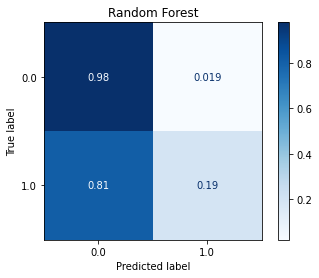

In [46]:
import matplotlib.pyplot as plt
plt.figure()
plot_confusion_matrix(estimator= clf, X=X_train, y_true=y_train,
                      normalize='true', cmap='Blues').ax_ \
                      .set_title('Random Forest')

Text(0.5, 1.0, 'Random Forest')

<Figure size 432x288 with 0 Axes>

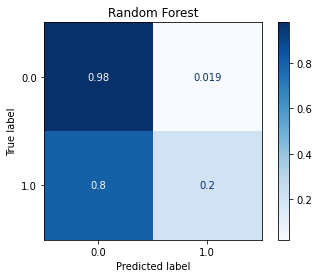

In [47]:
plt.figure()
plot_confusion_matrix(estimator= clf, X=X_test, y_true=y_test,
                      normalize='true', cmap='Blues').ax_ \
                      .set_title('Random Forest')

## XGBClassifier

In [48]:
from xgboost import XGBClassifier
clf = XGBClassifier(max_depth=2, random_state=0)

model = Pipeline([
  ('feature_selection', SelectFromModel(LinearSVR(random_state=0))),
  ('cla', clf)
])

model.fit(X_train, y_train)

[00:30:14] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


Pipeline(steps=[('feature_selection',
                 SelectFromModel(estimator=LinearSVR(random_state=0))),
                ('cla',
                 XGBClassifier(base_score=0.5, booster='gbtree',
                               colsample_bylevel=1, colsample_bynode=1,
                               colsample_bytree=1, gamma=0, gpu_id=-1,
                               importance_type='gain',
                               interaction_constraints='',
                               learning_rate=0.300000012, max_delta_step=0,
                               max_depth=2, min_child_weight=1, missing=nan,
                               monotone_constraints='()', n_estimators=100,
                               n_jobs=4, num_parallel_tree=1, random_state=0,
                               reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
                               subsample=1, tree_method='exact',
                               validate_parameters=1, verbosity=None))])

In [49]:
y_train_pred = model.predict(X_train)
print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

         0.0       0.70      0.86      0.77      3054
         1.0       0.71      0.49      0.58      2177

    accuracy                           0.71      5231
   macro avg       0.71      0.67      0.68      5231
weighted avg       0.71      0.71      0.69      5231



In [50]:
y_test_pred = model.predict(X_test)
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

         0.0       0.69      0.85      0.76      1292
         1.0       0.69      0.47      0.56       951

    accuracy                           0.69      2243
   macro avg       0.69      0.66      0.66      2243
weighted avg       0.69      0.69      0.67      2243



Text(0.5, 1.0, 'Random Forest')

<Figure size 432x288 with 0 Axes>

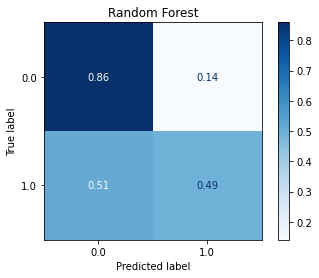

In [51]:
plt.figure()
plot_confusion_matrix(estimator= model, X=X_train, y_true=y_train,
                      normalize='true', cmap='Blues').ax_ \
                      .set_title('Random Forest')

Text(0.5, 1.0, 'Random Forest')

<Figure size 432x288 with 0 Axes>

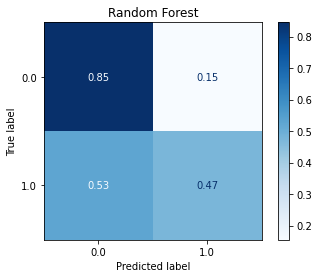

In [52]:
plt.figure()
plot_confusion_matrix(estimator= model, X=X_test, y_true=y_test,
                      normalize='true', cmap='Blues').ax_ \
                      .set_title('Random Forest')

# Conclusiones de Clasificación
* El algoritmo que mejor resultado nos dió fue Random Forest con un accuracy del F1-score del 0.69